# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Silvia Dwi Cahyani
- **Email:** silviadwic258@gmail.com
- **ID Dicoding:** silviadwic

## Menentukan Pertanyaan Bisnis

- Bagaimana performa rental pada setiap Jam berdasarkan Harinya?
- Bagaimana hubungan jumlah rental terhadap data lainnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

#### Baca Dataset

In [2]:
df = pd.read_csv("data/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Informasi Dataset

In [3]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 17379
Columns: 17


In [ ]:
df["season"] = df["season"].map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

#### Cek Tipe Data

In [5]:
print("Data Types")
print(df.dtypes)

Data Types
instant         int64
dteday         object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


**Insight:**
- Berdasarkan data yang dikumpulkan, terdapat 17379 baris dan 17 kolom dalam dataset.
- Data terdiri dari berbagai tipe, termasuk integer, float, dan object.

### Assessing Data

#### Periksa Missing Values

In [6]:
print("Missing Values")
print(df.isnull().sum())

Missing Values
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Periksa Duplicated Data

In [7]:
print("Duplicated Data:", df.duplicated().sum())

Duplicated Data: 0


#### Periksa Outliers

In [8]:
Q1 = df["cnt"].quantile(0.25)
Q3 = df["cnt"].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + 1.5 * IQR
minimum = Q1 - 1.5 * IQR

lower_than = df["cnt"] < minimum
higher_than = df["cnt"] > maximum

outliers = df[lower_than | higher_than]

print("Outliers:", outliers.shape[0])

Outliers: 505


**Insight:**
- Berdasarkan hasil pengecekan, tidak ada nilai yang hilang (missing values) dalam dataset.
- Dataset tidak memiliki data yang terduplikasi.
- Terdapat 505 baris data yang teridentifikasi sebagai outliers berdasarkan perhitungan IQR.

### Cleaning Data

#### Hilangkan Outliers

In [ ]:
df.drop(df[lower_than].index, inplace=True)
df.drop(df[higher_than].index, inplace=True)

#### Informasi Dataset setelah Menghilangkan Outliers

In [10]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  16874
Columns:  17


**Insight:**
- Setelah proses pembersihan outliers, jumlah baris dalam dataset berkurang dari 17379 menjadi 16874.

## Exploratory Data Analysis (EDA)

### Explore Dataset

#### Jumlah Rental Setiap Musim

In [11]:
df.groupby(by="season").agg({
    "cnt": ["sum", "mean"],
    "atemp": ["mean"],
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                 atemp
           sum        mean      mean
season                              
fall    909146  211.527687  0.655311
summer  805771  189.459440  0.517724
winter  741576  180.872195  0.412814
spring  457818  108.410609  0.296727

#### Jumlah Rental di Hari Biasa dan Hari Libur

In [12]:
df.groupby(by="holiday").agg({
    "cnt": ["sum", "mean"],
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt            
             sum        mean
holiday                     
0        2837264  173.257450
1          77047  154.712851

## Visualization & Explanatory Analysis

### Pertanyaan 1:

[Text(0.5, 1.0, 'Rental pada Jam tertentu berdasarkan Hari')]

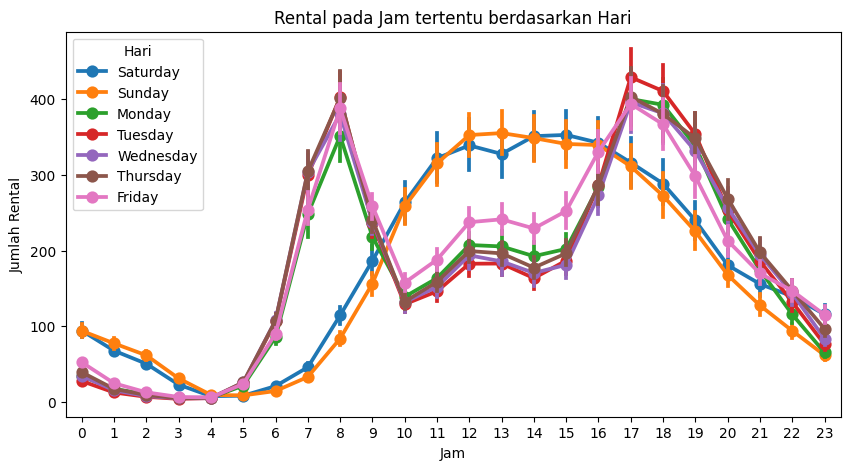

In [19]:
copy_df = df.copy()
copy_df["weekday"] = copy_df["weekday"].map(
    {
        0: "Sunday",
        1: "Monday",
        2: "Tuesday",
        3: "Wednesday",
        4: "Thursday",
        5: "Friday",
        6: "Saturday",
    }
)

fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(data=copy_df, x="hr", y="cnt", hue="weekday")
ax.set_xlabel("Jam")
ax.set_ylabel("Jumlah Rental")
ax.legend(title="Hari")
ax.set(title="Rental pada Jam tertentu berdasarkan Hari")

### Pertanyaan 2:

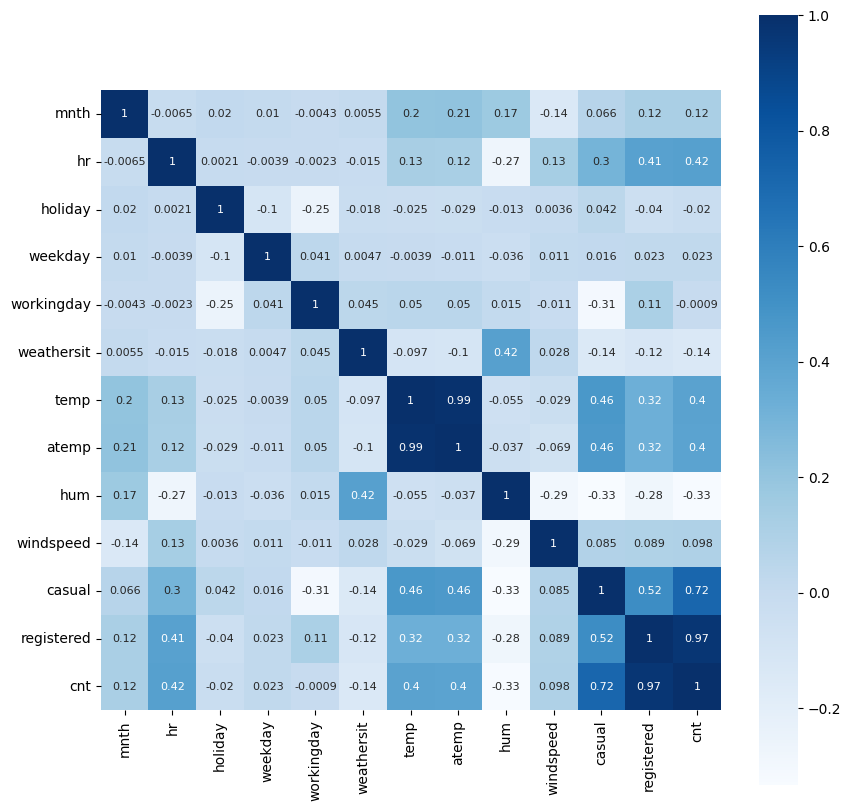

In [14]:
corr_df = df.drop(columns=["instant", "season", "dteday", "yr"],axis=1)
correlation_values = corr_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_values,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')
plt.show() 

**Insight:**
- Di hari kerja (weekday) jumlah rental lebih besar pada jam 06-10 dan jam 16-21. Sedangkan di hari akhir minggu (weekend), jumlah rental lebih besar pada jam 10-20.
- Jumlah rental memiliki hubungan negatif terhadap hari libur dan cuaca

## Analisis Lanjutan (Opsional)

#### Clustering dengan Metode 

Bertujuan untuk mencari tahu distribusi data rental terhadap temperatur yang dikelompokkan secara manual menggunakan metode binning.

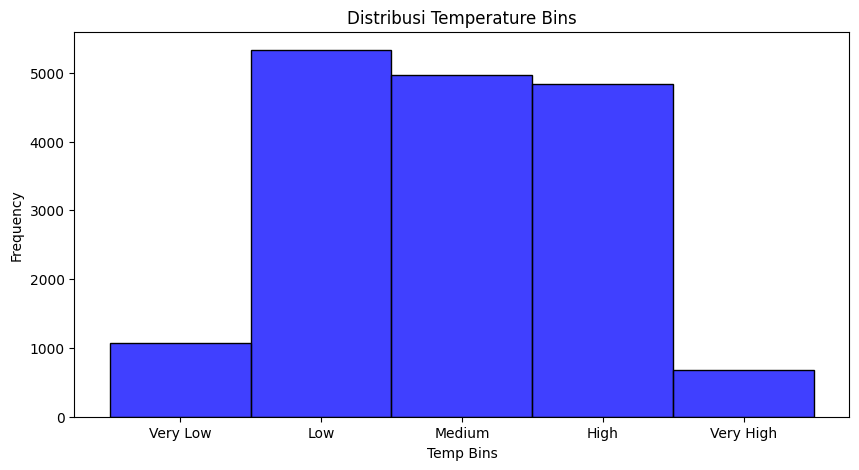

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['temp_bins'] = pd.cut(df['temp'], bins=bins, labels=labels)

plt.figure(figsize=(10, 5))
sns.histplot(df['temp_bins'], kde=False, color='blue')
plt.title('Distribusi Temperature Bins')
plt.xlabel('Temp Bins')
plt.ylabel('Frequency')
plt.show()

**Insight:**
- Dapat disimpulkan bahwa sebagian besar frekuensi ada pada suhu low, medium, dan high.
- Dapat disimpulkan bahwa kategori very low dan very high memiliki frekuensi rendah yang menunjukkan bahwa jumlah rental menurun pada suhu ekstrem.

## Conclusion

### Jawaban Pertanyaan 1
- Performa rental di hari kerja tinggi di pagi hari mulai jam 06.00 hingga 10.00 di mana banyak orang sedang melakukan perjalanan pagi misal berangkat kerja.
- Performa rental di hari kerja juga tinggi di sore hingga malam hari mulai jam 16.00 hingga 21.00 di mana banyak orang sedang beristirahat atau sedang melakukan perjalanan malam misal pulang kerja.

### Jawaban Pertanyaan 2
- Data hari libur dan cuaca memiliki hubungan negatif terhadap jumlah rental.
- Pada analisis lanjutan di mana saya melakukan clustering terhadap suhu juga menampilkan bahwa sebagian besar rental terjadi pada suhu yang tidak ekstrem yang pastinya juga bergantung dengan cuaca pada data tercatat.